In [1]:
import scipy as sp
import pylab as pl
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Лабораторная работа 2. Приложения сингулярного разложения

Фамилия, имя: Никита Труханов

Отделение: Computer Science

## 1. Сжатие информации с помощью SVD (3 балла)

Загрузите выложенную на странице курса фотографию вашего любимого куратора Сони.

Поскольку фотография чёрно-белая, её можно проинтерпетировать как матрицу, элементы которой - это насыщенность серого цвета каждого из пикселей. Постройте сингулярное разложение этой матрицы (не нужно центрировать данные!). 

Визуализуйте первую главную компоненту. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте компонеты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения? Как изменится результат, если сначала вы центрируете данные?

**Важное замечание.** Поскольку на семинаре по этому поводу возникло много вопросов, поясняем, что главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.

### Решение

Загрузим изображение

In [69]:
from PIL import Image
from scipy import misc

img = sp.misc.imread(r'C:\Users\darth_000\sonyasmall.jpg')[:,:,0] # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Посмотрим на Соню!

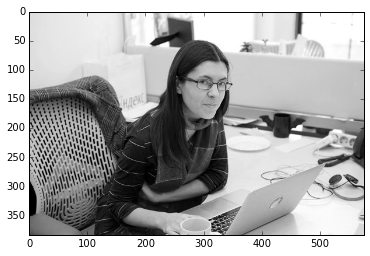

In [70]:
plt.gray()
imgplot = plt.imshow(img)
plt.show()

(384L,)
(384L, 384L)
(384L, 576L)
(384L, 384L)


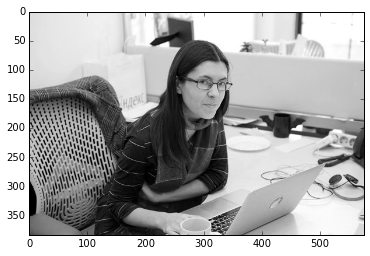

In [143]:
U, D, V = np.linalg.svd(img, full_matrices=False)
print D.shape
print U.shape
print V.shape
print np.diag(D).shape

plt.gray()
imgplot = plt.imshow(U.dot(np.diag(D)).dot(V))
plt.show()

Посмотрим значения компонент в логарифмическом масштабе. Видим, что первая компонента на порядо больше второй, далее убывание не такое быстрое.

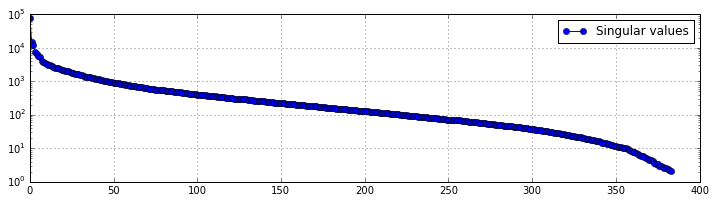

In [144]:
pl.figure(figsize=(12, 3))
pl.plot(D, 'o-', label = 'Singular values')
pl.yscale('log')
pl.grid(True)
pl.legend()

In [77]:
def LeaveFewElements(D, low, high):
    Dcopy = np.copy(D)
    for i in range(0, Dcopy.shape[0]):
        if (i < low or i > high):
            Dcopy[i] = 0
    return Dcopy

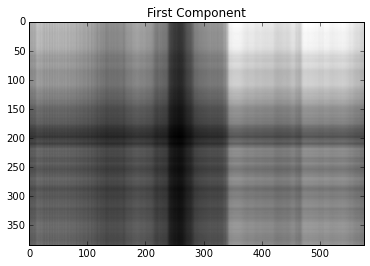

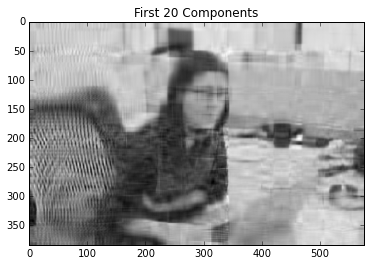

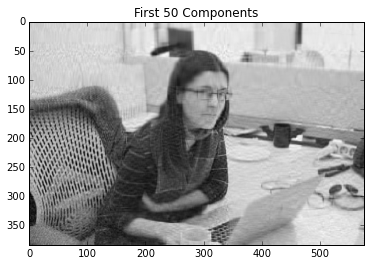

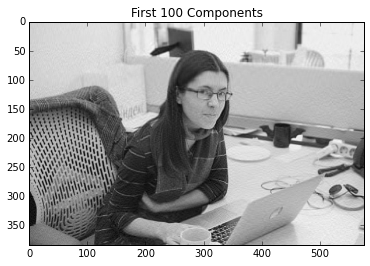

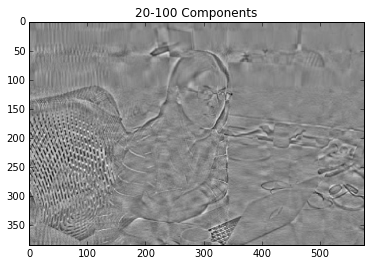

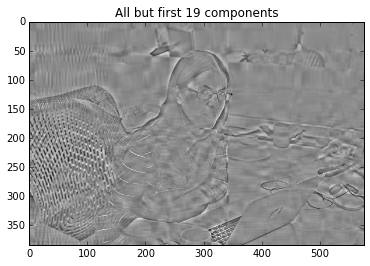

In [172]:
D_first_comp = LeaveFewElements(D, 0, 0)
Img_first_comp = U.dot(np.diag(D_first_comp)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_first_comp)
plt.title("First Component")
plt.show()


D_1_20 = LeaveFewElements(D, 0, 19)
Img_1_20 = U.dot(np.diag(D_1_20)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_1_20)
plt.title("First 20 Components")
plt.show()

D_1_50 = LeaveFewElements(D, 0, 49)
Img_1_50 = U.dot(np.diag(D_1_50)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_1_50)
plt.title("First 50 Components")
plt.show()

D_1_100 = LeaveFewElements(D, 0, 99)
Img_1_100 = U.dot(np.diag(D_1_100)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_1_100)
plt.title("First 100 Components")
plt.show()

D_20_100 = LeaveFewElements(D, 19, 99)
Img_20_100 = U.dot(np.diag(D_20_100)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_20_100)
plt.title("20-100 Components")
plt.show()

D_20_last = LeaveFewElements(D, 19, D.shape[0] - 1)
Img_20_last = U.dot(np.diag(D_20_last)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_20_last)
plt.title("All but first 19 components")
plt.show()

Вообще говоря, метод plt.imshow обманчив, так как, едва мы изменили тип матрицы от исходной (которая хранила целые 8-битные значения) в матрицу типа double, метод начал автоматом масштабировать цвета, принимая самое маленькое значения за черный пиксель, а самое большое за белый). Когда мы рисовали первые несколько компонент, включая главную, то это было не так важно, так как на исходной картинке есть и почти белые и почти черные цвета, а с учетом сохранения главной компоненты, рэнж значений в матрице получался примерно таким же как и в исходной.
Однако, без главной компоненты там есть как положительные так и отрицательные значения, при этом по модулю они не очень большие (см. print(Img_20_last)).
Если оставить масштаб цветов от 0 до 255 картинка будет совсем иной. Часть значений будет чисто черной (так как меньше нуля), другая часть будет очень темной, так как значения малы по сравнению с 255. Такая визуализация не очень наглядна, но позволяет понять, что масштаб влияния последних компонент мал.

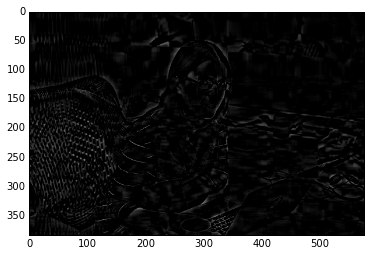

[[ -6.368447    -4.54143511  -7.32049897 ...,  -5.29284286  -8.54263845
  -11.58061071]
 [ -6.50187136  -4.84890124  -7.43709733 ...,  -5.03317697  -8.19180293
  -11.14313134]
 [ -6.30644089  -4.72421074  -7.19720689 ...,  -4.96451911  -8.05806982
  -10.94833759]
 ..., 
 [-20.43676415 -16.47215438  -9.70473973 ...,  10.75817948  13.48593843
   16.11949592]
 [-22.93289809 -18.02276425 -10.19303128 ...,   9.88919374  12.51637018
   14.03320454]
 [-24.16935041 -16.344635   -10.30016232 ...,   7.28220065   9.86030656
   12.40763664]]


In [131]:
D_20_last = LeaveFewElements(D, 19, D.shape[0] - 1)
Img_20_last = U.dot(np.diag(D_20_last)).dot(V)
plt.gray()
imgplot = plt.imshow(Img_20_last, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
plt.show()
print (Img_20_last)

Вычтем среднее значение серого цвета из картинки и повторим процедуру. Не забываем, что imshow будет автоматически скейлить значения, так что, если мы просто выведем на экран децентрированную картинку, отличий мы не заметим.

156.463383427


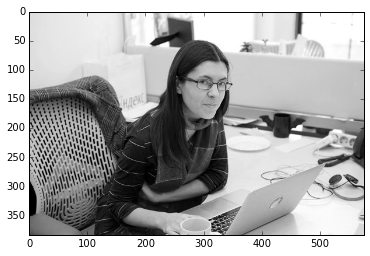

In [145]:
mean_gray = mean(img)
print mean_gray
img_centered = np.copy(img) - mean_gray

plt.gray()
imgplot = plt.imshow(img_centered)
plt.show()

U_c, D_c, V_c = np.linalg.svd(img_centered, full_matrices=False)

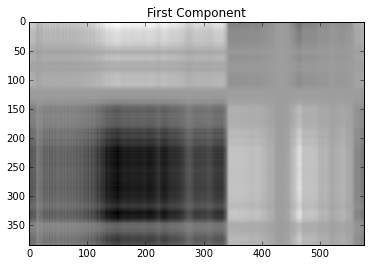

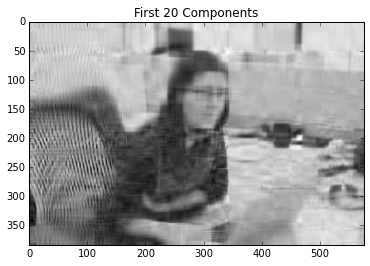

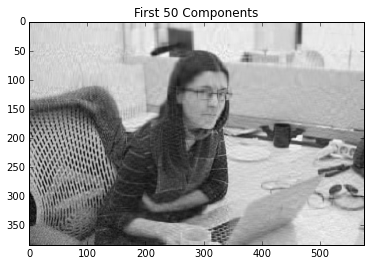

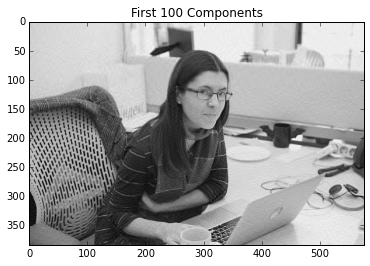

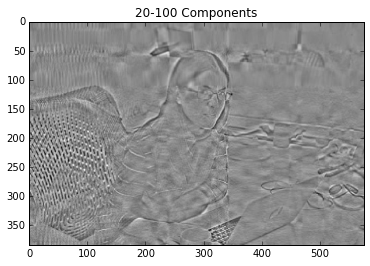

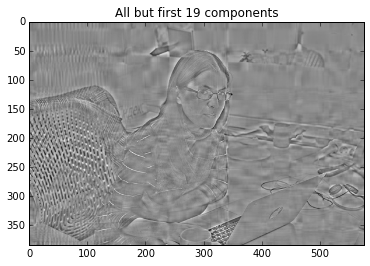

In [183]:
D_first_comp = LeaveFewElements(D_c, 0, 0)
Img_first_comp = U_c.dot(np.diag(D_first_comp)).dot(V_c)
plt.gray()
imgplot = plt.imshow(Img_first_comp)
plt.title("First Component")
plt.show()

D_1_20 = LeaveFewElements(D_c, 0, 19)
Img_1_20 = U_c.dot(np.diag(D_1_20)).dot(V_c)
plt.gray()
imgplot = plt.imshow(Img_1_20)
plt.title("First 20 Components")
plt.show()

D_1_50 = LeaveFewElements(D_c, 0, 49)
Img_1_50 = U_c.dot(np.diag(D_1_50)).dot(V_c)
plt.gray()
imgplot = plt.imshow(Img_1_50)
plt.title("First 50 Components")
plt.show()

D_1_100 = LeaveFewElements(D_c, 0, 99)
Img_1_100 = U_c.dot(np.diag(D_1_100)).dot(V_c)
plt.gray()
imgplot = plt.imshow(Img_1_100)
plt.title("First 100 Components")
plt.show()

D_20_100 = LeaveFewElements(D_c, 19, 99)
Img_20_100 = U_c.dot(np.diag(D_20_100)).dot(V_c)
plt.gray()
imgplot = plt.imshow(Img_20_100)
plt.title("20-100 Components")
plt.show()

D_20_last = LeaveFewElements(D_c, 19, D.shape[0] - 1)
Img_20_last = U_c.dot(np.diag(D_20_last)).dot(V_c)
plt.gray()
imgplot = plt.imshow(Img_20_last)
plt.title("All but first 19 components")
plt.show()


Большие отличия между центрированным и нецентрированным наблюдаются в первой компоненте. В принципе, так как значения в матрице распределены между 0 и 255 более-менее равномернено (в том смысле, что значений близких к нулю достаточно много), то центрирование не дает больших преимуществ.
Если бы удаление значений от нуля было бы велико по сравнению с разбросом значений (например, цвета бы были от 252 до 255), центрирование бы могло ощутимо ускорить сходимость.

Изначально, для хранения картинки из 8-битного серого цвета размера $m \times n$ (в нашем случае $384 \times 576$) нужно было $m \times n$ байт. Для хранения разложения по первым $k$ компонентам нужно хранить подматрицу матрицы $U$ размера $m \times k$ и подматрицу $V$ размера $n \times k$, а также саму диагональ размера $k$.
Итого, нам нужно хранить $(m+n + 1)\times k$ чисел. Правда, для выполнения всех этих разложений нам вряд ли подойдет тип данных byte. Скорее, как минимум, 4-х, а то и 8-ми байтный тип с плавающей точкой.
Для данной картинки достаточно примерно 100 компонент (хотя картинка при этом остается достаточно шумной, как будто ее снимали с ISO 1600). 50 компонент никак не хватает, картинка очень грубая.
Тогда на хранение картинки целиком нужно $384 \times 576 = 221\, 184$ байт. А на хранения 100 компонент нужно $(384 + 576 + 1) \times 100 = 96 \, 100$ чисел. Если бы мы нам достаточно было одного байта на число, получился бы всего двухкратный выигрыш. Но так как, по-видимому, нужен хотя-бы четырехбайтный float, мы даже проигрываем в памяти. Впрочем, для картинок большего размера  выигрыш может быть более ощутимым. 

## 2. Визуализация данных с помощью SVD (5 баллов)

Загрузите со страницы курса файлы `messages_texts.txt`, `messages_features.txt` и `messages_vectorized.txt`.

**Внимание!** Не пытайтесь открыть файл `messages_vectorized.txt` в блокноте или, тем более, распечатать его в IPython ноутбуке. Сначала посмотрите на его объём.

* `messages_texts.txt` содержит некоторое количество текстовых сообщений на английском языке с кучей разных дополнительных данных, которые вам не нужны. Сообщение номер k начинается с заголовка post_number_k.
* `messages_features.txt` содержит список слов, которые содержатся в теле сообщений, кроме самых употребительных из списка `stopwords.words("english")`
* `messages_vectorized.txt` содержит матрицу, в которой указано, сколько раз каждое слово встретилось в каждом сообщении.

Загрузите эту матрицу с помощью функции `numpy.loadtxt`. Найдите её сингулярное разложение. Визуализуйте несколько первых признаков. Постарайтесь понять, сколько различных тематик было представлено в исходной выборке. Что это за тематики? Попытайтесь выяснить, какие слова в наибольшей степени влияют на отнесение текста к той ли иной тематике.

Не обязательно парсить файл `messages_texts.txt`; чтобы найти сообщение с нужным номером, вы можете просто воспользоваться поиском по файлу!

In [173]:
data = loadtxt(r'C:\Users\darth_000\messages_vectorized.txt', delimiter = ',')



**Центрировать данные** можно с помощью функции `sklearn.preprocessing.scale`:

In [178]:
from sklearn.preprocessing import scale
data_scaled = scale(data, with_mean = True, with_std=False, axis=0)

In [180]:
data_U, data_D, data_V = np.linalg.svd(data_scaled, full_matrices=False)

def LeaveFewElements(D, low, high):
    Dcopy = np.copy(D)
    for i in range(0, Dcopy.shape[0]):
        if (i < low or i > high):
            Dcopy[i] = 0
    return Dcopy

In [182]:
print data_D.shape
print data_U.shape
print data_V.shape

(1733L,)
(1733L, 1733L)
(1733L, 34934L)


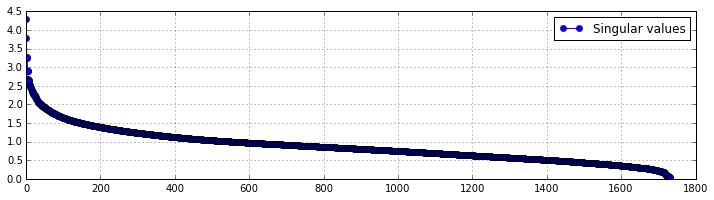

In [186]:
pl.figure(figsize=(12, 3))
pl.plot(data_D, 'o-', label = 'Singular values')
#pl.yscale('log')
pl.grid(True)
pl.legend()

Создадим матрицу из 10 признаков. (Хотя на графике отложим и вовсе только три из них)

In [233]:
k = 10
B = data_U[:,0:k].dot(np.diag(data_D[0:k]))
print B

[[ 0.00245768  0.03888068 -0.00286347 ..., -0.06639502  0.04156686
  -0.07697674]
 [ 0.03972202 -0.10797402  0.05101523 ...,  0.0557953  -0.14683854
  -0.01167364]
 [ 0.02702651  0.0729118   0.01952856 ...,  0.05754412  0.02276588
   0.00486165]
 ..., 
 [ 0.02033462  0.00580606 -0.03979363 ...,  0.00651717 -0.04224963
   0.01181903]
 [ 0.00765078  0.00447608 -0.00479835 ..., -0.03052584  0.00357299
   0.0208194 ]
 [ 0.02708992 -0.08660852  0.03128107 ...,  0.01333589 -0.03083139
  -0.00929602]]


Нарисуем scatterplot по первым трем признакам. Получили фигуру, в которой видим пять лучей. Возможно, при большем количестве признаков были бы другие количества. Лучи соответствует "темам" (получили, что их пять штук, хотя, чем больше брать признаков, тем больше можно разделять темы на более мелкие). Случайным образом отметим некоторые краевые точки (у которых некий набор координат превышает некий порог, то есть которые явно находятся в лучах).

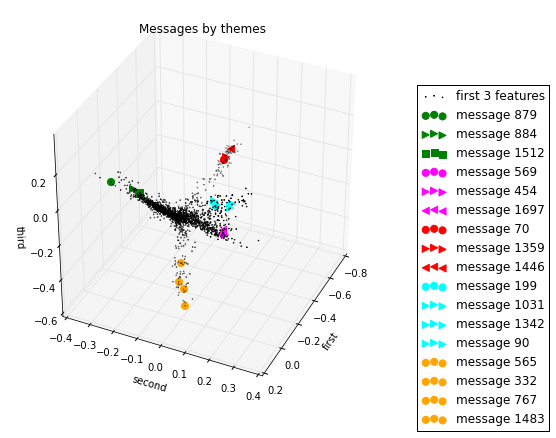

In [362]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (7,7))
bx = fig.add_subplot(111, projection='3d')
bx.scatter(B[:,0], B[:,1], B[:,2], color = 'black', label = 'first 3 features', marker = 'x', s = 1)
#bx.scatter(Dimensions, Size, QRTime, color = 'blue', label = 'QR')
bx.scatter(B[879,0], B[879,1], B[879,2], color = 'green', s = 50, label = 'message 879')
bx.scatter(B[884,0], B[884,1], B[884,2], color = 'green', s = 50, marker = '>', label = 'message 884')
bx.scatter(B[1512,0], B[1512,1], B[1512,2], color = 'green', s = 50, marker = 's', label = 'message 1512')

bx.scatter(B[569,0], B[569,1], B[569,2], color = 'magenta', s = 50,  label = 'message 569')
bx.scatter(B[454,0], B[454,1], B[454,2], color = 'magenta', s = 50, marker = '>',  label = 'message 454')
bx.scatter(B[1697,0], B[1697,1], B[1697,2], color = 'magenta', s = 50, marker = '<',  label = 'message 1697')

bx.scatter(B[70,0], B[70,1], B[70,2], color = 'red', s = 50,  label = 'message 70')
bx.scatter(B[1359,0], B[1359,1], B[1359,2], color = 'red', s = 50, marker = '>',  label = 'message 1359')
bx.scatter(B[1446,0], B[1446,1], B[1446,2], color = 'red', s = 50, marker = '<',  label = 'message 1446')

bx.scatter(B[199,0], B[199,1], B[199,2], color = 'cyan', s = 50,  label = 'message 199')
bx.scatter(B[1031,0], B[1031,1], B[1031,2], color = 'cyan', s = 50, marker = '>',  label = 'message 1031')
bx.scatter(B[1342,0], B[1342,1], B[1342,2], color = 'cyan', s = 50, marker = '>',  label = 'message 1342')
bx.scatter(B[90,0], B[90,1], B[90,2], color = 'cyan', s = 50, marker = '>',  label = 'message 90')

bx.scatter(B[565,0], B[565,1], B[565,2], color = 'orange', s = 50,  label = 'message 565')
bx.scatter(B[332,0], B[332,1], B[332,2], color = 'orange', s = 50,  label = 'message 332')
bx.scatter(B[767,0], B[767,1], B[767,2], color = 'orange', s = 50,  label = 'message 767')
bx.scatter(B[1483,0], B[1483,1], B[1483,2], color = 'orange', s = 50,  label = 'message 1483')

#condition = True
#while condition:
#    i = np.random.randint(0, 1732)
#    if (B[i,3] > 0.2 ):
#        condition = False

#bx.scatter(B[i,0], B[i,1], B[i,2], color = 'blue', s = 50, label = 'message rand')
#print i


bx.set_xlabel('first')
bx.set_ylabel('second')
bx.set_zlabel('third')
bx.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)

#Этот инструмент позволяет менять точку зрения
bx.view_init(elev=35, azim=25)
#bx.view_init(elev=0, azim=0)
plt.title("Messages by themes")
plt.show()

Прочитав отмеченные на графике письма, можно сказать, что на графике отмечены следующие темы:

Зеленая - компьютерная(программная) тема;

Фиолетовая - оружейная тема;

Красная - медицина/физиология;

Голубая - инциденты с человеческими жертвами (убийства, несчастные случаи);

Оранжевая - глутамат натрия;

В целом, по графику видно, что тема смертельных инцидентов находится между оружейной темой и медициной (что, в общем-то, логично)


Составим матрицу сигналов:

In [419]:
k = 10
K = (np.diag(data_D[0:k]).dot(data_V[0:k, :])).T
print K.shape

(34934L, 10L)


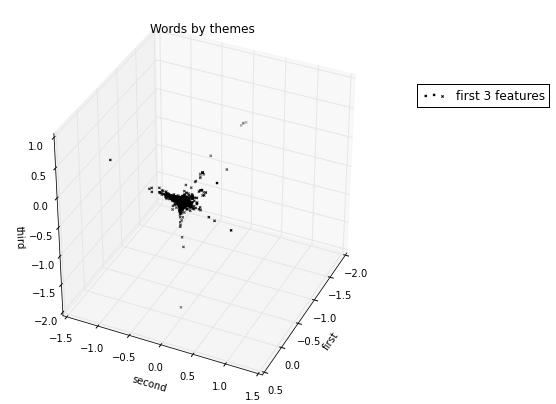

In [420]:
fig = plt.figure(figsize = (7,7))
cx = fig.add_subplot(111, projection='3d')
cx.scatter(K[:,0], K[:,1], K[:,2], color = 'black', label = 'first 3 features', marker = 'x', s = 5)


cx.set_xlabel('first')
cx.set_ylabel('second')
cx.set_zlabel('third')
cx.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)

#Этот инструмент позволяет менять точку зрения
cx.view_init(elev=35, azim=25)
#cx.view_init(elev=0, azim=90)
plt.title("Words by themes")
plt.show()

In [421]:
#words = loadtxt(r'C:\Users\darth_000\messages_features.txt', delimiter = " ")
#print words

files = open("C:\Users\darth_000\messages_features.txt")

words =  files.readlines()
#print words_list

Kmodule = []

for i in range (0, K.shape[0]):
    Kmodule.append(0)
    for j in range (0, K.shape[1]):
        Kmodule[i] = Kmodule[i] + K[i, j]*K[i,j]


In [422]:
KandWords = zip(Kmodule, words)

KWsorted = sorted(KandWords, key=lambda i: -i[0]) 

print KWsorted[0:20]

[(4.972537676886664, 'msg\n'), (4.4565259921774754, 'window\n'), (3.1537994178805584, 'stratus\n'), (2.8822193595417387, 'pitt\n'), (2.8604892347787367, 'geb\n'), (2.833914125177095, 'banks\n'), (2.6783633891858902, 'gordon\n'), (2.2049704902368261, 'gun\n'), (1.8550415264176086, 'dyer\n'), (1.571314624070663, 'dresden\n'), (1.3576122615468855, 'tu\n'), (1.1308956975549929, 'cdt\n'), (1.098987839310793, 'sw\n'), (1.0193306575785526, 'inf\n'), (1.0120808362136049, 'edu\n'), (0.96939910635583637, 'fbi\n'), (0.91150763857372097, 'food\n'), (0.84637142354087369, 'roby\n'), (0.79389109384531675, 'com\n'), (0.76879145924612313, 'cs\n')]


Самые популярные слова, составленные при размерности $k = 10$:

msg (тот самый глютамат натрия); window (встречал во многих письмах по компьтерной теме);

stratus (компьютерная фирма, есть домен электронной почты); pitt (также домен в Питтсбурге);

geb (домен Гордон Банкс); banks (собственно, банки); gordon (туда же);

gun (оруженная тема); dyer (видимо, какой-то краситель); dresden;

tu; cdt; sw; inf; edu(в основном домены или имена в e-mail);

fbi (ФБР); food; roby; com(домен); cs(домен computer science)

## 3. Низкоранговые приближения (3 балла)

В этой задаче вам предстоит поразмышлять о низкоранговых приближениях и об их месте в мироздании.

Везде ниже $||\cdot||_2$ --- это операторная $l_2$-норма.

Зафиксируем некоторое $\varepsilon > 0$. Найти низкоранговое приближение матрицы $A$ с точностью $\varepsilon$ --- значит найти такую матрицу $Q$ с $k = k(\varepsilon)$ ортонормированными столбцами, для которой
$$
\begin{matrix}
\phantom{AAAAAAAAAAAAAAAAA} &
||A - QQ^TA||_2 < \varepsilon & \phantom{AAAAAAAAAAAAaa}(1)\end{matrix}$$
В этом случае линейная оболочка столбцов матрицы $Q$ является в каком-то смысле приближённым образом $A$.

Если ранг $k$ нам из каких-то соображений известен, то можно воспользоваться, например, сингулярным разложением. А если нет? Есть несколько способов этот ранг найти; мы предлагаем вам поэкспериментировать с одним из них.

Идея проста: если мы возьмём образы достаточно большого количества случайных векторов (обычно их берут из стандартного нормального распределения), с хорошей вероятностью их линейная оболочка будет приближать образ с нужной нам точностью. Главный вопрос в том, когда имеет смысл остановиться. И здесь помогает следующая

**Теорема.** Пусть $B\in\mathrm{Mat}_{m\times n}$ --- некоторая матрица, $\omega_1,\ldots,\omega_r$ --- случайные векторы, независимо выбранные из стандартного нормального распределения. Тогда
$$P\left\{||B||\leqslant 10\sqrt{\frac{2}{\pi}}\max_i{||B\omega_i||}\right\} \geqslant 1 - \min(m,n)\cdot10^{-r}$$

Воспользовавшись этой теоремой, напишите функцию `find_approximate(A, eps)`, находящую для данной матрицы $A$ и уровня точности $\varepsilon$ матрицу $Q$, удовлетворяющую условию (1). Поэкспериментируйте с матрицами разного размера. Получается ли ошибка $||A - QQ^TA||_2$ достаточно малой?

**Дополнительные вопросы:**

1. Каков вообще (геометрический? линейно алгебраический?) смысл неравенства $||A - QQ^TA||_2 < \varepsilon$? Что мы имеем в виду говоря, что линейная оболочка столбцов матрицы $Q$ является приближённым образом $A$?

2. Как построить приближённый SVD, если у нас уже имеется матрица $Q$, удовлетворяющая условию (1)? Найдите этим способом сингулярное разложение матрицы Гильберта и сравните его с вычисленным с помощью библиотечной функции `scipy.linalg.svd`. Удаётся ли вашей функции обогнать по времени библиотечную?

3. Зачастую при поиске низкорангового приближения фиксированного ранга $k$ для матрицы $A$ работают даже не с ней. а с матрицей $(AA^T)^qA$, где $q$ --- небольшое натуральное число (скажем, $2$ или $3$). Зачем это нужно? В каких случаях это оправдано?

4. У функции `make_regression` (см. ниже) есть любопытный параметр `effective_rank` (эффективный ранг). Попробуйте разобраться, что это такое. Можете попробовать дать его определение. Просто механически скопированная выдержка из какой-нибудь умной статьи не подойдёт; хочется, чтобы вы как следует разобрались с этим.

**В помощь хозяйке:**

Сгенерировать матрицу $X$ размера $m\times n$ с эффективным рангом $k$ можно с помощью команды

`X, y = make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=k, tail_strength=..., noise=0.0, shuffle=True, coef=False, random_state=None)`

Можете поэкспериментировать со значением `tail_strength`.

In [11]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
%pylab inline


def find_approximate(A, eps):
    tensqrt2pi = 7.978845608
    m = A.shape[0]
    n = A.shape[1]
   
    QQT = np.zeros((m,m))
    
    r = 12
    
    w = np.zeros((n, r))



    for i in range (0, r):
        w[:,i] = np.random.multivariate_normal([0]*n, np.eye(n))
        
    
    
    Q = np.zeros((m,0))
    
    q = np.zeros((m,1))
    
    
    for i in range (1, k + 1):
        q[:,0] = np.random.multivariate_normal([0]*m, np.eye(m))
        if (Q.shape[1] > 0):
            q = (np.eye(m) - Q.dot(sla.inv(Q.T.dot(Q))).dot(Q.T)).dot(q)
        q = q / sla.norm(q)
        Q = hstack([Q,q])
        
        AQQT = A - Q.dot(Q.T).dot(A)
        
        less = True
        for j in range (0, r):
            if (tensqrt2pi * sla.norm(AQQT.dot(w[:,j])) > eps):
                less = False
                break
        
        if less:
            break
    return Q


Populating the interactive namespace from numpy and matplotlib


Данный код  выдает Q, удовлетворяющую условию с вероятностью порядка $1- 10^{-r + min(n,m)}$ . Генерируем нормальные случайные величины $q$, берем проекцию ортогональную к текущему $Q$ (проектор $Q(Q'Q)^{-1}Q'$)

Проверим на матрице с эффективным рангом меньше размера матрицы
$Q$ действительно ранга 30

In [13]:
import sklearn.datasets
m = 50
n = 100
k = 30

X, y = sklearn.datasets.make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=k, tail_strength=0.1, noise=0.0, shuffle=True, coef=False, random_state=None)

Q = find_approximate(X, 0.1)
print Q.shape
print Q

(50L, 30L)
[[ 0.07157425  0.21678026 -0.00233179 ..., -0.01367272  0.13633949
  -0.03043988]
 [-0.05255552  0.05013327  0.21554996 ..., -0.12717945 -0.04029176
   0.02413907]
 [-0.04655709  0.14286226  0.24021438 ..., -0.10316411 -0.20860687
  -0.07904633]
 ..., 
 [ 0.15720667 -0.08950798  0.07339647 ...,  0.31353927  0.02376855
  -0.06538395]
 [-0.00526986 -0.13835132  0.20924758 ..., -0.01314956  0.01517136
  -0.05236054]
 [ 0.02504431  0.19916516  0.00299006 ..., -0.14892108  0.16936843
   0.02818858]]


Доп. вопрос 1.
Операторная $l_2$ норма оператора $C$ меньше $\varepsilon$ значит, что $\forall x, ||x|| = 1, ||Сx|| < \varepsilon$. В этом выражении $||\;||$ означает обучную Евклидову норму вектора.

$||A-QQ^TA||_2 < \varepsilon \Rightarrow ||(A-QQ^TA)x|| < \varepsilon$, для любого икс. То есть $||Ax-QQ^Ax|| < \varepsilon$. Это значит, что для любого вектора единичной длины $x$ результат от действия приближенным оператором на вектор $x$ будет отличаться от точного результата не более чем на $\varepsilon$. Если вектор $x$ не единичный, то, в силу линейности, можно утверждать, что погрешность вектора-результата составит не более чем $\varepsilon$ помноженной на норму $x$. 

$Q$ является приближенным образом матрицы $A$ вот в каком смысле:

Если на вектор $x$ подействовать оператором $A$ получится вектор $y$. Если на вектор $x$ подействовать оператором $QQ^TA$ получится вектор $z$. Согласно неравентсву, вектора $z$ и $y$ несильно отличаются. То есть, если построить треугольник на них в $m$-мерном пространстве, то третья сторона треугольника (соединяющая концы векторов) будет меньше чем $\varepsilon ||x||$. Но все вектора $z$ лежат в $k-мерной$ оболочке столбцов $Q$. Получается, что для любого вектора $x$ верно то, что он переходит в вектор $y$ который почти не отличается от какого-то вектора в этой линейной оболчке. То есть оператор $A$ как бы "сплющивает" в направлении подпространства, построенного на столбцах $Q$. Так как это верно для всех векторов $x$ мы можем говорить, что образов векторов $x$ "сплюснут" к этому подпространству. Что и означает, что эта линейная оболочка -- приближение образа $A$ 